# Projet 3: Concevez une application au service de la santé publique

## La mission

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

## Import all the necessary librairies - Importation de toutes les librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import collections
import inspect
import missingno
#import siuba as sb
#import plotnine as pln
import sklearn as skl
import scipy as sc
pd.set_option("display.max_rows", None)

In [2]:
#pip install siuba
#pip install plotnine 
#import siuba as sb
import plotnine as pln
#pip install missingno
#pip install quilt
#quilt install ResidentMario/missingno_data

In [3]:
>>> from quilt.data.ResidentMario import missingno_data
>>> collisions = missingno_data.nyc_collision_factors()
>>> collisions = collisions.replace("nan", np.nan)

## Import the data - Importation de la base de données

In [12]:
data = pd.read_csv('data/DS_project3.csv', sep='\t', nrows= 20000)
#data2 = data.copy() #In case we need it !!!!

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,13,27,28,29,31) have mixed types.Specify dtype option on import or set low_memory=False.


In [13]:
#data = pd.read_csv('data/DS_project3.csv', sep='\t', error_bad_lines=False, index_col=False, dtype={}) # or dtype='unicode'

In [14]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Databases' exploration - Exploration des bases de données

### Column's names

In [15]:
# Show all databases columns - Montre toutes les colonnes des bases de données
[data
.columns
.tolist()]

[['code',
  'url',
  'creator',
  'created_t',
  'created_datetime',
  'last_modified_t',
  'last_modified_datetime',
  'product_name',
  'abbreviated_product_name',
  'generic_name',
  'quantity',
  'packaging',
  'packaging_tags',
  'packaging_text',
  'brands',
  'brands_tags',
  'categories',
  'categories_tags',
  'categories_en',
  'origins',
  'origins_tags',
  'origins_en',
  'manufacturing_places',
  'manufacturing_places_tags',
  'labels',
  'labels_tags',
  'labels_en',
  'emb_codes',
  'emb_codes_tags',
  'first_packaging_code_geo',
  'cities',
  'cities_tags',
  'purchase_places',
  'stores',
  'countries',
  'countries_tags',
  'countries_en',
  'ingredients_text',
  'allergens',
  'allergens_en',
  'traces',
  'traces_tags',
  'traces_en',
  'serving_size',
  'serving_quantity',
  'no_nutriments',
  'additives_n',
  'additives',
  'additives_tags',
  'additives_en',
  'ingredients_from_palm_oil_n',
  'ingredients_from_palm_oil',
  'ingredients_from_palm_oil_tags',
  'ing

In [16]:
data.shape

(20000, 186)

In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
# Specify dtype option on import --> the reason we look at dtypes
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 186 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   code                                        object 
 1   url                                         object 
 2   creator                                     object 
 3   created_t                                   int64  
 4   created_datetime                            object 
 5   last_modified_t                             int64  
 6   last_modified_datetime                      object 
 7   product_name                                object 
 8   abbreviated_product_name                    float64
 9   generic_name                                object 
 10  quantity                                    object 
 11  packaging                                   object 
 12  packaging_tags                              object 
 13  packaging_text                

In [19]:
dtype_group = data.columns.to_series().groupby(data.dtypes).groups
dtype_group

{int64: ['created_t', 'last_modified_t'], float64: ['abbreviated_product_name', 'cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutriscore_score', 'nova_group', 'ecoscore_score_fr', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_

In [20]:
{dtype_subgroup.name: item for dtype_subgroup, item in dtype_group.items()}

{'int64': Index(['created_t', 'last_modified_t'], dtype='object'),
 'float64': Index(['abbreviated_product_name', 'cities', 'allergens_en',
        'serving_quantity', 'no_nutriments', 'additives_n', 'additives',
        'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
        'ingredients_that_may_be_from_palm_oil_n',
        ...
        'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
        'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
        'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
        'inositol_100g', 'carnitine_100g'],
       dtype='object', length=125),
 'object': Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
        'product_name', 'generic_name', 'quantity', 'packaging',
        'packaging_tags', 'packaging_text', 'brands', 'brands_tags',
        'categories', 'categories_tags', 'categories_en', 'origins',
        'origins_tags', 'origins_en', 'manufacturing_place

les colonnes qui m'intéressent sont les suivantes pour connaître les produits avec des allergènes:
'categories',
 'categories_tags',
 'categories_en',
 'main_category',
 'main_category_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en','additives',
        'additives_tags'
        'code',
        
        

première étape: demande à notre client l'allergène ou les allergènes qu'il souhaite éviter

deuxième étape: reconnait si oui ou non le produit scanné contient l'allergène que notre client veut éviter

troisième étape: propose si le produit scanné contient bien l'allergène une ou deux alternative sans ce dernier dans la même catégorie. Sinon si rien de la même catégorie, dans la même main catégorie, sinon désolé ne trouve rien dans cette catégorie ni même catégorie sans cette allergène. 

Aussi regarder pour la localisation de la personne

quatrième étape: prendre en compte que l'allergène n'est pas dans la liste des allergènes construit dans la machine. 


Combien de lignes et de colonnes ?

In [21]:
print("Au total, la base de données contient", data.shape[0], "lignes et", data.shape[1], "colonnes.")

Au total, la base de données contient 20000 lignes et 186 colonnes.


Les colonnes, soit les variables de notre base de données `data` sont les suivantes

In [22]:
[data
.columns
.tolist()]

[['code',
  'url',
  'creator',
  'created_t',
  'created_datetime',
  'last_modified_t',
  'last_modified_datetime',
  'product_name',
  'abbreviated_product_name',
  'generic_name',
  'quantity',
  'packaging',
  'packaging_tags',
  'packaging_text',
  'brands',
  'brands_tags',
  'categories',
  'categories_tags',
  'categories_en',
  'origins',
  'origins_tags',
  'origins_en',
  'manufacturing_places',
  'manufacturing_places_tags',
  'labels',
  'labels_tags',
  'labels_en',
  'emb_codes',
  'emb_codes_tags',
  'first_packaging_code_geo',
  'cities',
  'cities_tags',
  'purchase_places',
  'stores',
  'countries',
  'countries_tags',
  'countries_en',
  'ingredients_text',
  'allergens',
  'allergens_en',
  'traces',
  'traces_tags',
  'traces_en',
  'serving_size',
  'serving_quantity',
  'no_nutriments',
  'additives_n',
  'additives',
  'additives_tags',
  'additives_en',
  'ingredients_from_palm_oil_n',
  'ingredients_from_palm_oil',
  'ingredients_from_palm_oil_tags',
  'ing

Comme nous pouvons le voir, nous avons des variables pouvant se regrouper en plusieurs catégories:
    - les variables qualitatives
    - les variables quantitatives

    - les variables décrivant le produit même (qui la créé, son url, son code) :
    - les variables décrivant le lieu - 
    - les variables décrivant les ingrédients, allergènes, etc.
    - les variables décrivant les vitamines
    - les variables comme le nutriscore, etc. - 

Nous allons regarder parmi ces variables, laquelle est la clé unique de la base de données `data`

In [23]:
data[['code',
  'url',
  'creator',
  'created_t',
  'created_datetime',
  'last_modified_t',
  'last_modified_datetime',
  'product_name',
  'abbreviated_product_name',
  'generic_name',
  'quantity',
  'packaging',
  'packaging_tags',
  'packaging_text',
  'brands',
  'brands_tags',
  'categories',
  'categories_tags',
  'categories_en',
  'origins',
  'origins_tags',
  'origins_en',
  'manufacturing_places',
  'manufacturing_places_tags',
  'labels',
  'labels_tags',
  'labels_en',
  'emb_codes',
  'emb_codes_tags',
  'first_packaging_code_geo',
  'cities',
  'cities_tags',
  'purchase_places',
  'stores',
  'countries',
  'countries_tags',
  'countries_en',
  'ingredients_text',
  'allergens',
  'allergens_en',
  'traces',
  'traces_tags',
  'traces_en',
  'serving_size',
  'serving_quantity',
  'no_nutriments',
  'additives_n',
  'additives',
  'additives_tags',
  'additives_en',
  'ingredients_from_palm_oil_n',
  'ingredients_from_palm_oil',
  'ingredients_from_palm_oil_tags',
  'ingredients_that_may_be_from_palm_oil_n',
  'ingredients_that_may_be_from_palm_oil',
  'ingredients_that_may_be_from_palm_oil_tags',
  'nutriscore_score',
  'nutriscore_grade',
  'nova_group',
  'pnns_groups_1',
  'pnns_groups_2',
  'states',
  'states_tags',
  'states_en',
  'brand_owner',
  'ecoscore_score_fr',
  'ecoscore_grade_fr',
  'main_category',
  'main_category_en',
  'image_url',
  'image_small_url',
  'image_ingredients_url',
  'image_ingredients_small_url',
  'image_nutrition_url',
  'image_nutrition_small_url',
  'energy-kj_100g',
  'energy-kcal_100g',
  'energy_100g',
  'energy-from-fat_100g',
  'fat_100g',
  'saturated-fat_100g',
  '-butyric-acid_100g',
  '-caproic-acid_100g',
  '-caprylic-acid_100g',
  '-capric-acid_100g',
  '-lauric-acid_100g',
  '-myristic-acid_100g',
  '-palmitic-acid_100g',
  '-stearic-acid_100g',
  '-arachidic-acid_100g',
  '-behenic-acid_100g',
  '-lignoceric-acid_100g',
  '-cerotic-acid_100g',
  '-montanic-acid_100g',
  '-melissic-acid_100g',
  'monounsaturated-fat_100g',
  'polyunsaturated-fat_100g',
  'omega-3-fat_100g',
  '-alpha-linolenic-acid_100g',
  '-eicosapentaenoic-acid_100g',
  '-docosahexaenoic-acid_100g',
  'omega-6-fat_100g',
  '-linoleic-acid_100g',
  '-arachidonic-acid_100g',
  '-gamma-linolenic-acid_100g',
  '-dihomo-gamma-linolenic-acid_100g',
  'omega-9-fat_100g',
  '-oleic-acid_100g',
  '-elaidic-acid_100g',
  '-gondoic-acid_100g',
  '-mead-acid_100g',
  '-erucic-acid_100g',
  '-nervonic-acid_100g',
  'trans-fat_100g',
  'cholesterol_100g',
  'carbohydrates_100g',
  'sugars_100g',
  '-sucrose_100g',
  '-glucose_100g',
  '-fructose_100g',
  '-lactose_100g',
  '-maltose_100g',
  '-maltodextrins_100g',
  'starch_100g',
  'polyols_100g',
  'fiber_100g',
  '-soluble-fiber_100g',
  '-insoluble-fiber_100g',
  'proteins_100g',
  'casein_100g',
  'serum-proteins_100g',
  'nucleotides_100g',
  'salt_100g',
  'sodium_100g',
  'alcohol_100g',
  'vitamin-a_100g',
  'beta-carotene_100g',
  'vitamin-d_100g',
  'vitamin-e_100g',
  'vitamin-k_100g',
  'vitamin-c_100g',
  'vitamin-b1_100g',
  'vitamin-b2_100g',
  'vitamin-pp_100g',
  'vitamin-b6_100g',
  'vitamin-b9_100g',
  'folates_100g',
  'vitamin-b12_100g',
  'biotin_100g',
  'pantothenic-acid_100g',
  'silica_100g',
  'bicarbonate_100g',
  'potassium_100g',
  'chloride_100g',
  'calcium_100g',
  'phosphorus_100g',
  'iron_100g',
  'magnesium_100g',
  'zinc_100g',
  'copper_100g',
  'manganese_100g',
  'fluoride_100g',
  'selenium_100g',
  'chromium_100g',
  'molybdenum_100g',
  'iodine_100g',
  'caffeine_100g',
  'taurine_100g',
  'ph_100g',
  'fruits-vegetables-nuts_100g',
  'fruits-vegetables-nuts-dried_100g',
  'fruits-vegetables-nuts-estimate_100g',
  'collagen-meat-protein-ratio_100g',
  'cocoa_100g',
  'chlorophyl_100g',
  'carbon-footprint_100g',
  'carbon-footprint-from-meat-or-fish_100g',
  'nutrition-score-fr_100g',
  'nutrition-score-uk_100g',
  'glycemic-index_100g',
  'water-hardness_100g',
  'choline_100g',
  'phylloquinone_100g',
  'beta-glucan_100g',
  'inositol_100g',
  'carnitine_100g']].agg(['count', 'size', 'nunique'])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,20000,20000,20000,20000,20000,20000,20000,19456,0,266,...,22,11253,0,0,0,0,77,0,0,0
size,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
nunique,20000,20000,225,12991,12991,13323,13323,16309,0,247,...,21,49,0,0,0,0,22,0,0,0


"code" apparaît est la clé unique de ce tableau.

Nous pouvons observer que des colonnes entières ne contiennent pas ou très peu de données. Nous pourrons nous débarasser de ces colonnes

<AxesSubplot:>

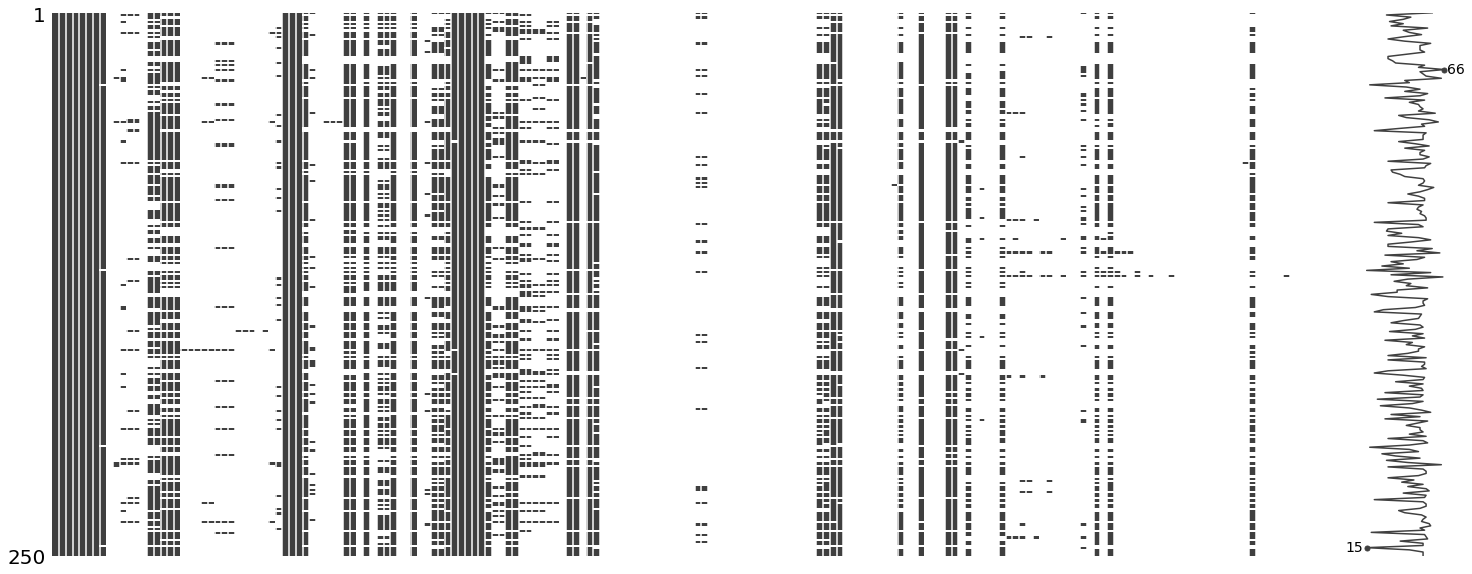

In [29]:
>>> datana = data.replace("NaN", np.nan)
>>> import missingno as msno
>>> %matplotlib inline
>>> msno.matrix(datana.sample(250))

<AxesSubplot:>

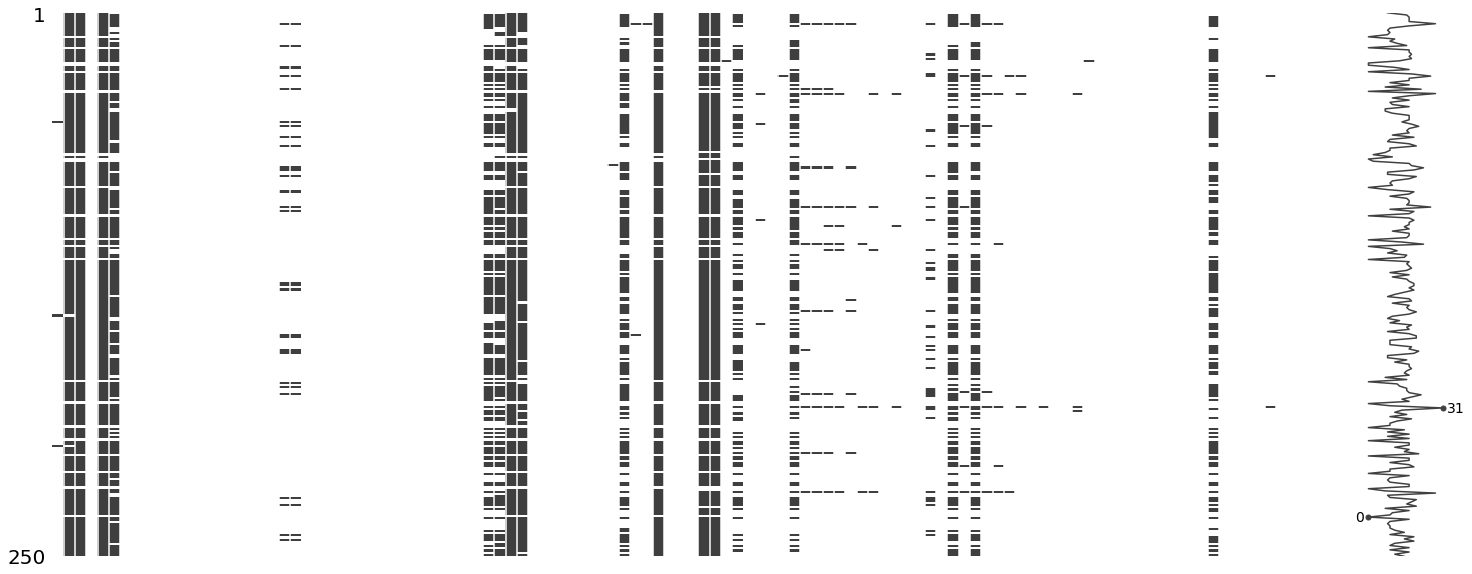

In [36]:
>>> new_data = data.loc[:,'energy-kj_100g':'carnitine_100g']
>>> %matplotlib inline
>>> msno.matrix(new_data.sample(250))

<AxesSubplot:>

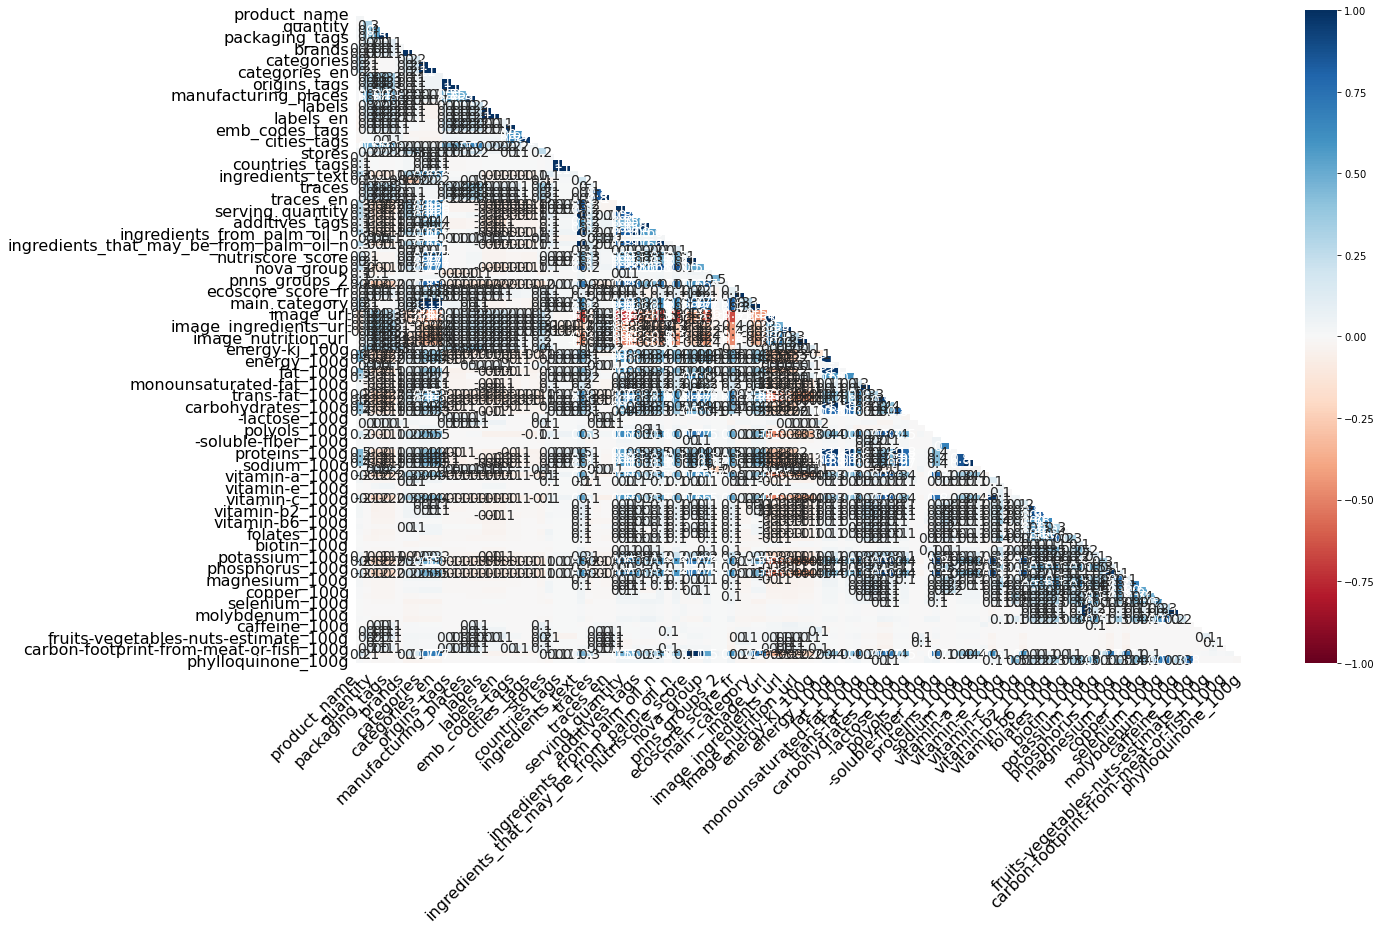

In [37]:
msno.heatmap(data)

<AxesSubplot:>

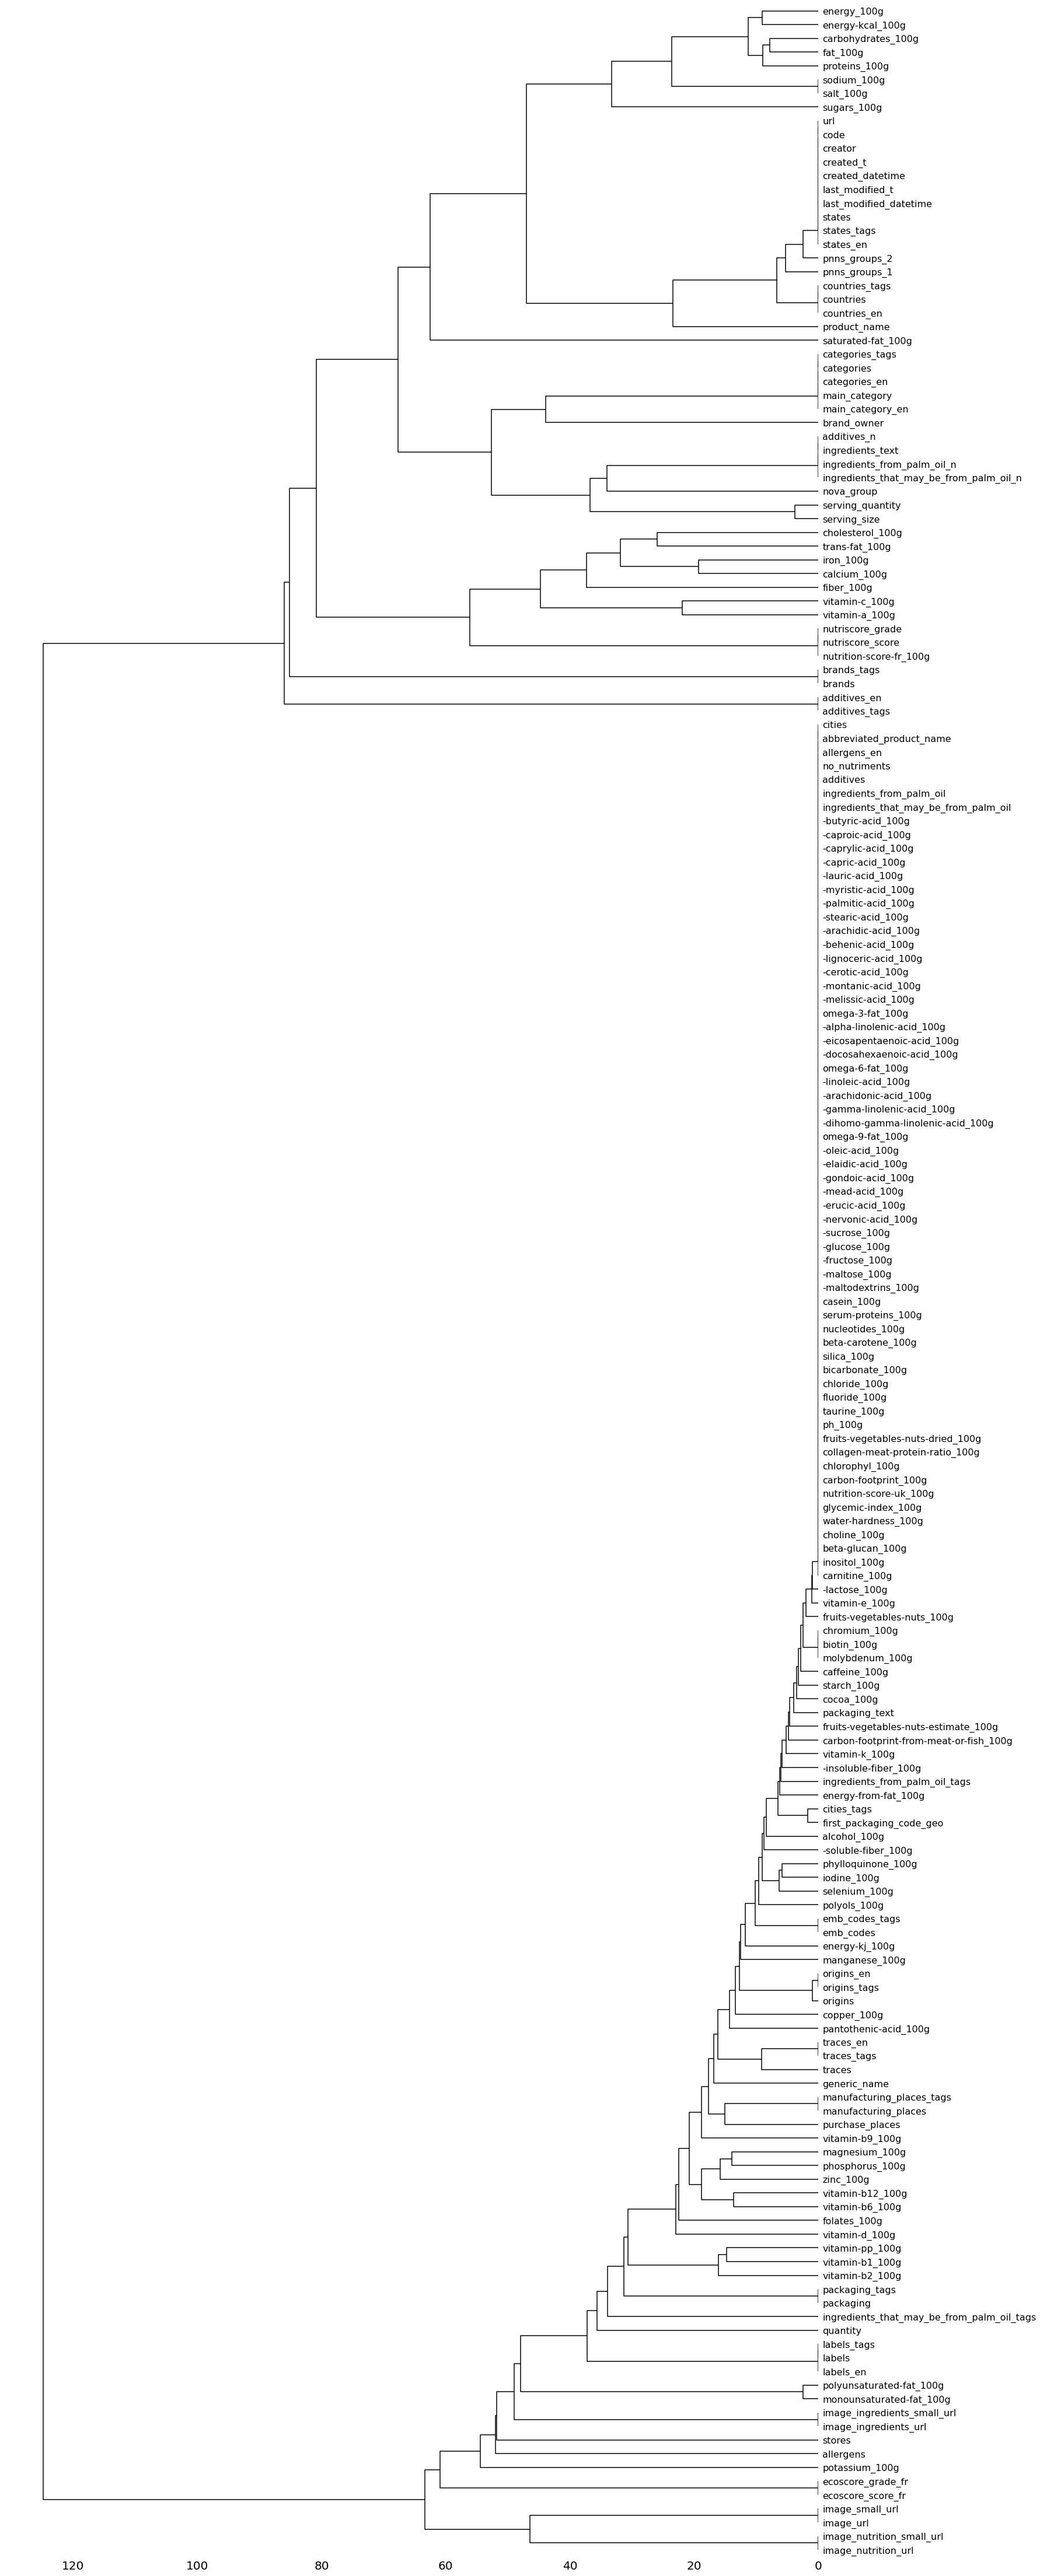

In [39]:
>>> msno.dendrogram(data)

In [46]:
data.isna().sum()

code                      0
url                       0
creator                   0
created_t                 0
created_datetime          0
                      ...  
choline_100g          20000
phylloquinone_100g    19923
beta-glucan_100g      20000
inositol_100g         20000
carnitine_100g        20000
Length: 186, dtype: int64

In [75]:
data.isnull().sum()

code                      0
url                       0
creator                   0
created_t                 0
created_datetime          0
                      ...  
choline_100g          20000
phylloquinone_100g    19923
beta-glucan_100g      20000
inositol_100g         20000
carnitine_100g        20000
Length: 186, dtype: int64

In [61]:
data2 = data.dropna(axis=1, how='all')

In [62]:
data2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,cocoa_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,phylloquinone_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0013120000324,http://world-en.openfoodfacts.org/product/0013...,org-database-usda,1587665619,2020-04-23T18:13:39Z,1587665619,2020-04-23T18:13:39Z,Homestyle mashed potatoes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
19996,0013120000416,http://world-en.openfoodfacts.org/product/0013...,vegan-app-chakib,1607182502,2020-12-05T15:35:02Z,1607182509,2020-12-05T15:35:09Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,0013120000829,http://world-en.openfoodfacts.org/product/0013...,openfoodfacts-contributors,1586454746,2020-04-09T17:52:26Z,1610752324,2021-01-15T23:12:04Z,Tater tots seasoned frozen shredded potatoes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,0013120001338,http://world-en.openfoodfacts.org/product/0013...,openfoodfacts-contributors,1575917325,2019-12-09T18:48:45Z,1587638525,2020-04-23T10:42:05Z,Crispy crowns,NaN,30 oz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


We will compare the two and see which variables have being dropped because they were completely empty. The first list contains all the original columns whereas the second one has only the ones remaining after getting rid of those without any values in it. Each row appears to be just one item (product and brand). Else they seem to be coming from different sources. I might need to group them according to it. Need to make sure their are no doubles also. need to check the date. Eventually only keep the french or american ones. 

In [71]:
>>> list_data = data.columns.tolist()
>>> list_data2 = data2.columns.tolist()
>>> difference = set(list_data) - set(list_data2)
>>> list_difference = list(set_difference)
>>> list_difference

['-alpha-linolenic-acid_100g',
 'fruits-vegetables-nuts-dried_100g',
 '-lignoceric-acid_100g',
 'ingredients_from_palm_oil',
 '-arachidonic-acid_100g',
 'omega-6-fat_100g',
 'ph_100g',
 'no_nutriments',
 'fluoride_100g',
 '-myristic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'glycemic-index_100g',
 'beta-glucan_100g',
 '-maltose_100g',
 'additives',
 'taurine_100g',
 '-nervonic-acid_100g',
 '-gondoic-acid_100g',
 '-melissic-acid_100g',
 'casein_100g',
 'nucleotides_100g',
 '-palmitic-acid_100g',
 '-mead-acid_100g',
 'chloride_100g',
 'chlorophyl_100g',
 'allergens_en',
 '-fructose_100g',
 '-montanic-acid_100g',
 'ingredients_that_may_be_from_palm_oil',
 '-capric-acid_100g',
 'beta-carotene_100g',
 '-lauric-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'nutrition-score-uk_100g',
 'omega-9-fat_100g',
 '-eicosapentaenoic-acid_100g',
 'silica_100g',
 'inositol_100g',
 '-elaidic-acid_100g',
 'collagen-meat-protein-ratio_100g',
 'carbon-footprint_100g',
 '-sucrose_100g',
 '-erucic-acid

It appears that a big chunk of all the variables without only null values are those containing the string 100g at the end. This is maybe because they are relatively new variables and they haven't being completed for now. 

In [73]:
print("Anyway, we find ourselves now with", data2.shape[1], "variables")

Anyway, we find ourselves now with 123 variables


In [ ]:
Let's look again at those  

In [83]:
data.missing(data2
.isnull()
.sum()
.astype(float))

code                                           0.0
url                                            0.0
creator                                        0.0
created_t                                      0.0
created_datetime                               0.0
                                            ...   
fruits-vegetables-nuts-estimate_100g       19979.0
cocoa_100g                                 19988.0
carbon-footprint-from-meat-or-fish_100g    19978.0
nutrition-score-fr_100g                     8747.0
phylloquinone_100g                         19923.0
Length: 123, dtype: float64

In [96]:
percent_missing = data2.isnull().sum() * 100 / len(data2)
missing_value_data2 = pd.DataFrame({'column_name': data2.columns,
                                 'percent_missing': percent_missing})

In [97]:
missing_value_data2.sort_values('percent_missing', inplace=True)

In [98]:
missing_value_data2

,column_name,percent_missing
code,code,0.000
url,url,0.000
creator,creator,0.000
created_t,created_t,0.000
created_datetime,created_datetime,0.000
last_modified_t,last_modified_t,0.000
last_modified_datetime,last_modified_datetime,0.000
states,states,0.000
states_tags,states_tags,0.000
states_en,states_en,0.000


In [105]:
data3 = data2.dropna(thresh=data2.shape[0]*0.2, how='all',axis=1) # keep only the columns have less than 80% of its data missing

In [106]:
percent_missing = data3.isnull().sum() * 100 / len(data3)
missing_value_data3 = pd.DataFrame({'column_name': data3.columns,
                                 'percent_missing': percent_missing})
missing_value_data3.sort_values('percent_missing', inplace=True)
missing_value_data3

,column_name,percent_missing
code,code,0.000
states_en,states_en,0.000
states,states,0.000
last_modified_datetime,last_modified_datetime,0.000
last_modified_t,last_modified_t,0.000
states_tags,states_tags,0.000
created_t,created_t,0.000
url,url,0.000
created_datetime,created_datetime,0.000
creator,creator,0.000


In [110]:
print("After cleaning our data by keeping only the columns where less than 80% of the data is missing, we end up with", missing_value_data3.shape[0], "columns.")

After cleaning our data by keeping only the columns where less than 80% of the data is missing, we end up with 54 columns.
